In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
download_data = True
data_prep = True
initialize_ee = False
if initialize_ee:
    !earthengine authenticate
import numpy as np
import xarray as xr
import pandas as pd

In [ ]:
!pip install wxee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
# if download_data:
#     import ee
#     ee.Initialize()
#     import wxee
#     wxee.Initialize()

In [ ]:
if download_data:
    !git clone https://github.com/scotthosking/get-station-data.git
    !mv get-station-data/* .
    !pip install -v -e .

Cloning into 'get-station-data'...
remote: Enumerating objects: 381, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 381 (delta 54), reused 54 (delta 47), pack-reused 287 (from 1)
Receiving objects: 100% (381/381), 1.06 MiB | 2.92 MiB/s, done.
Resolving deltas: 100% (196/196), done.
Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-b4ecuhkb/get_station_data.egg-info
  writing /tmp/pip-pip-egg-info-b4ecuhkb/get_station_data.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-b4ecuhkb/get_station_data.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-b4ecuhkb/get_station_data.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-b4ecuhkb/get_station_data.egg-info/top_level.txt
  writing manifest file '/tmp/pip

In [ ]:
import pandas as pd

if download_data:
    from get_station_data.util import nearest_stn
    from get_station_data import ghcnd

%matplotlib inline

In [ ]:
from get_station_data import ghcnd
from get_station_data.util import nearest_stn

%matplotlib inline

In [ ]:
stn_md = ghcnd.get_stn_metadata()

FileNotFoundError: [Errno 2] No such file or directory: 'tmp_inv.txt'

In [ ]:
if download_data:
    stn_md = ghcnd.get_stn_metadata()

/content/get_station_data/ghcnd.py:384: UserWarning: urlretrieve failed with args ('https://www.ncei.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt', 'tmp_inv.txt') after 4 retries. Received error HTTP Error 404: Not Found. 
  warnings.warn(f"{callable_fn.__name__} failed with args {args} after {num_retries} retries. "


FileNotFoundError: [Errno 2] No such file or directory: 'tmp_inv.txt'

In [ ]:
if download_data:
    london_lon_lat = -0.1278, 51.5074
    austin_lon_lat = -97.7603, 30.3208
    nigeria_lon_lat = 8.6753, 9.0820
    my_stns = nearest_stn(stn_md,
                            nigeria_lon_lat[0], nigeria_lon_lat[1],
                            n_neighbours=1000)

In [ ]:
if download_data:
    my_stns.iloc[[0]]

In [ ]:
lat_start, lat_end, lon_start, lon_end = 4, 14, 3, 15

In [ ]:
my_stns = my_stns[my_stns['lat']>lat_start][my_stns['lat']<lat_end][my_stns['lon']>lon_start][my_stns['lon']<lon_end]
my_stns

<ipython-input-9-2471e4945fb9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  my_stns = my_stns[my_stns['lat']>lat_start][my_stns['lat']<lat_end][my_stns['lon']>lon_start][my_stns['lon']<lon_end]


,station,lat,lon,elev,name
46475,NIM00065134,9.640,8.869,1289.9,YAKUBU GOWON
46480,NIM00065271,7.704,8.614,113.1,MAKURDI
46474,NIM00065123,9.617,6.533,260.0,MINNA
46479,NIM00065257,6.467,7.550,137.0,ENUGU
46471,NIM00065046,12.048,8.525,476.1,MALLAM AMINU INTL
46476,NIM00065167,9.258,12.430,182.6,YOLA
46463,NGM00061091,12.983,8.933,403.0,MAGARIA
46473,NIM00065101,8.440,4.494,343.2,ILORIN
46478,NIM00065250,5.015,6.950,26.5,PORT HARCOURT INTL
46453,NG000001080,13.470,7.080,388.0,MARADI


In [ ]:
my_stns.shape

(27, 5)

In [ ]:
df_ = pd.DataFrame()
if download_data:
    for i in range(my_stns.shape[0]):
        df = ghcnd.get_data(my_stns.iloc[[i]])
        df_ = df_.append(df)

<ipython-input-11-30bdfb4266ab>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(df)
<ipython-input-11-30bdfb4266ab>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(df)
<ipython-input-11-30bdfb4266ab>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(df)
<ipython-input-11-30bdfb4266ab>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(df)
<ipython-input-11-30bdfb4266ab>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ = df_.append(df)
<ipython-input-11-30bdfb4266ab>:5: FutureWarn

In [ ]:
df_

,station,year,month,day,element,value,mflag,qflag,sflag,date,lon,lat,elev,name
0,NIM00065134,1973,1,1,TAVG,NaN,,,,1973-01-01,8.869,9.64,1289.9,YAKUBU GOWON
1,NIM00065134,1973,1,2,TAVG,NaN,,,,1973-01-02,8.869,9.64,1289.9,YAKUBU GOWON
2,NIM00065134,1973,1,3,TAVG,NaN,,,,1973-01-03,8.869,9.64,1289.9,YAKUBU GOWON
3,NIM00065134,1973,1,4,TAVG,NaN,,,,1973-01-04,8.869,9.64,1289.9,YAKUBU GOWON
4,NIM00065134,1973,1,5,TAVG,250.0,H,,S,1973-01-05,8.869,9.64,1289.9,YAKUBU GOWON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,CMM00064930,2020,10,27,TAVG,NaN,,,,2020-10-27,13.733,4.60,668.0,BERTOUA
864,CMM00064930,2020,10,28,TAVG,NaN,,,,2020-10-28,13.733,4.60,668.0,BERTOUA
865,CMM00064930,2020,10,29,TAVG,NaN,,,,2020-10-29,13.733,4.60,668.0,BERTOUA
866,CMM00064930,2020,10,30,TAVG,NaN,,,,2020-10-30,13.733,4.60,668.0,BERTOUA


In [ ]:
if download_data:
    df__ = df_.copy() #df_[df_['element']=='PRCP'].copy()
    df_stations = df__.copy() #  df__[df__['name']=='TX AUSTIN-CAMP MABRY'].copy()
    df_stations['month'] = df_stations['month'].astype(str).str.zfill(2)
    df_stations['day'] = df_stations['day'].astype(str).str.zfill(2)
    df_stations['datetime'] = df_stations['year'].astype(str)+df_stations['month']+df_stations['day']
    df_stations['datetime'] = pd.to_datetime(df_stations['datetime'], format="%Y%m%d")
    df_stations = df_stations.set_index(['datetime'])

In [ ]:
if download_data:
    df_stations.element.unique()

In [ ]:
df_stations.head()

,station,year,month,day,element,value,mflag,qflag,sflag,date,lon,lat,elev,name
datetime,,,,,,,,,,,,,,
1973-01-01,NIM00065134,1973,01,01,TAVG,NaN,,,,1973-01-01,8.869,9.64,1289.9,YAKUBU GOWON
1973-01-02,NIM00065134,1973,01,02,TAVG,NaN,,,,1973-01-02,8.869,9.64,1289.9,YAKUBU GOWON
1973-01-03,NIM00065134,1973,01,03,TAVG,NaN,,,,1973-01-03,8.869,9.64,1289.9,YAKUBU GOWON
1973-01-04,NIM00065134,1973,01,04,TAVG,NaN,,,,1973-01-04,8.869,9.64,1289.9,YAKUBU GOWON
1973-01-05,NIM00065134,1973,01,05,TAVG,250.0,H,,S,1973-01-05,8.869,9.64,1289.9,YAKUBU GOWON


YAKUBU GOWON
MAKURDI
MINNA
ENUGU
MALLAM AMINU INTL
YOLA
MAGARIA
ILORIN
PORT HARCOURT INTL
MARADI
GAROUA
ZINDER
GOURE
DOUALA
NGAOUNDERE
MAIDUGURI
MAINE-SORDA
MAINE-SOROA
SALAK
BIRNI N'KONNI
DIFFA


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


MURTALA MUHAMMED
GAYA
DEDOUGOU
PALA
DOSSO
BERTOUA


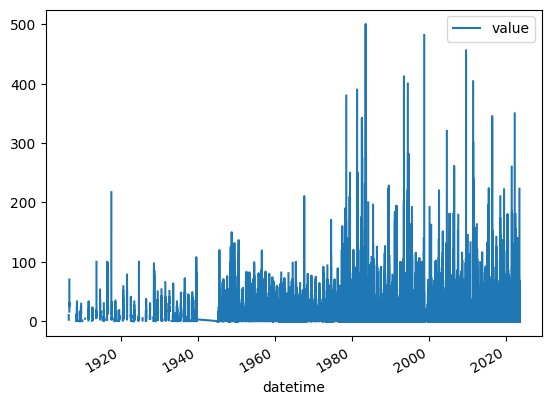

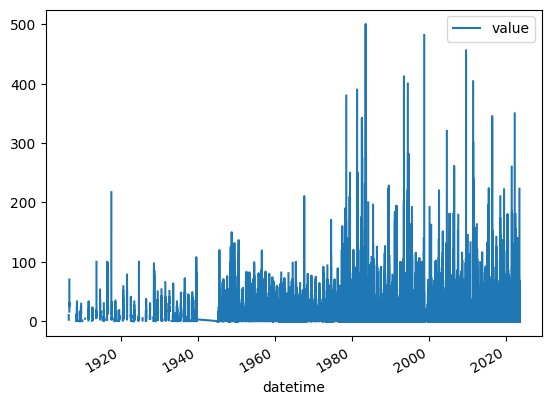

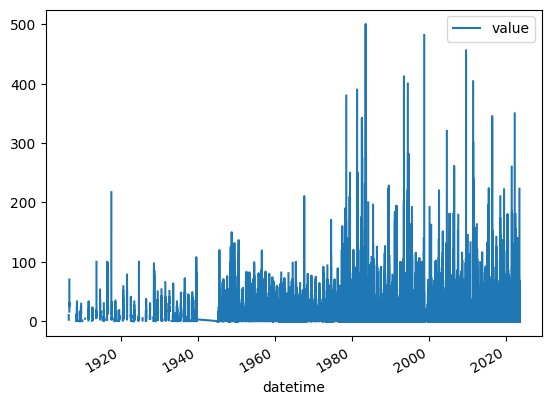

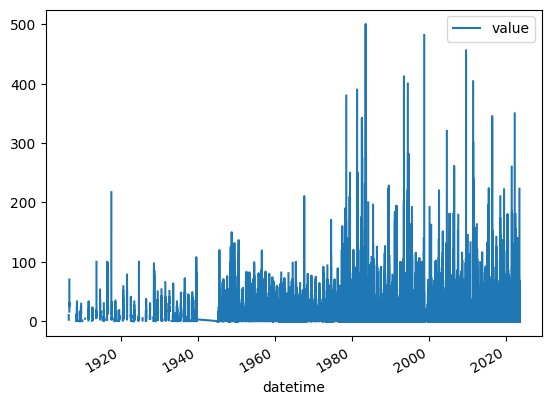

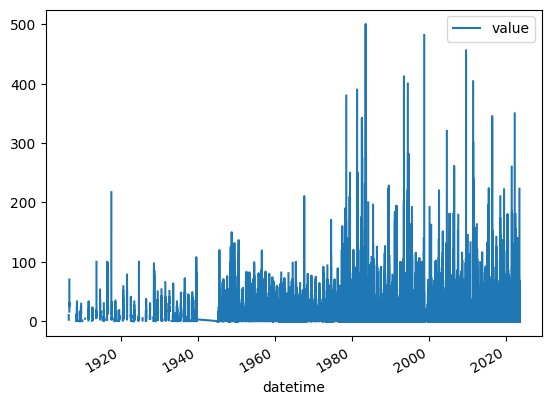

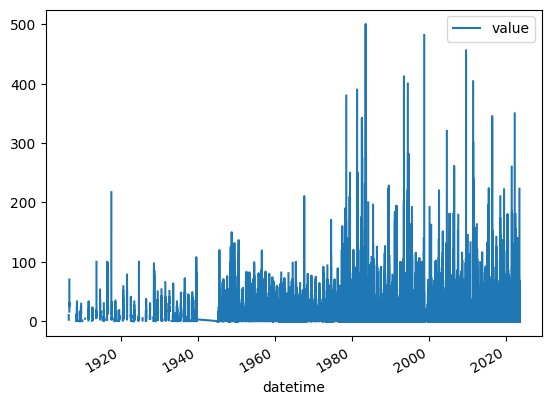

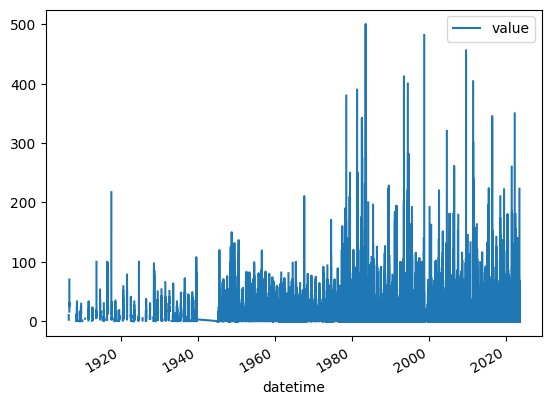

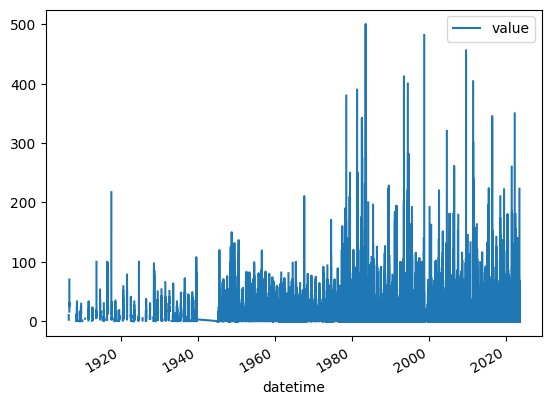

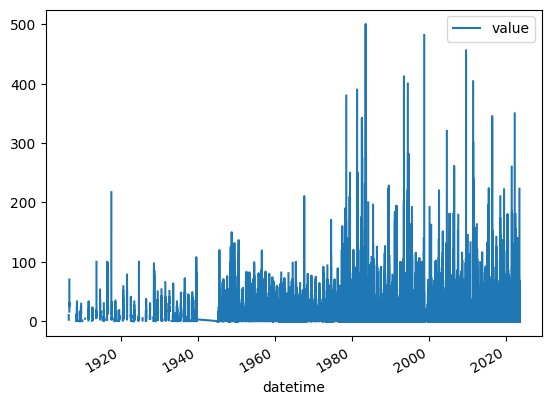

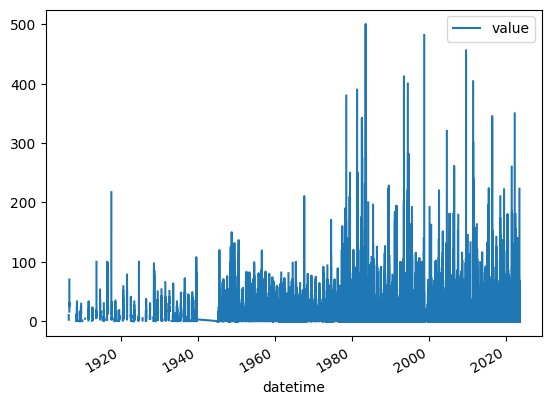

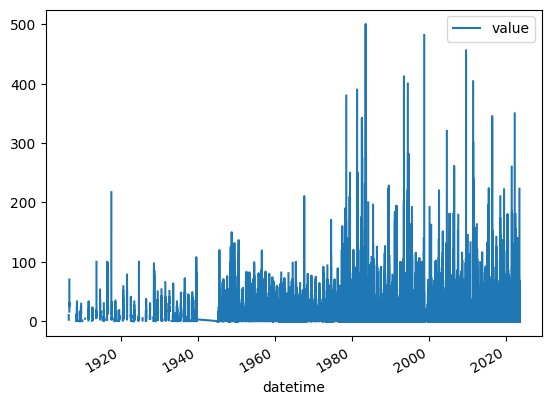

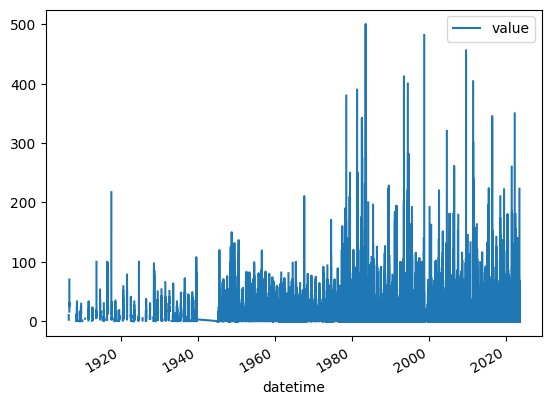

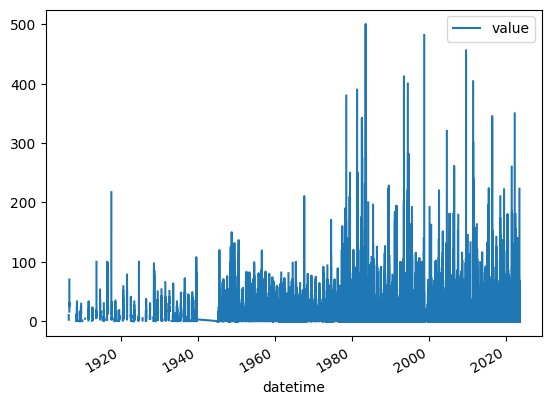

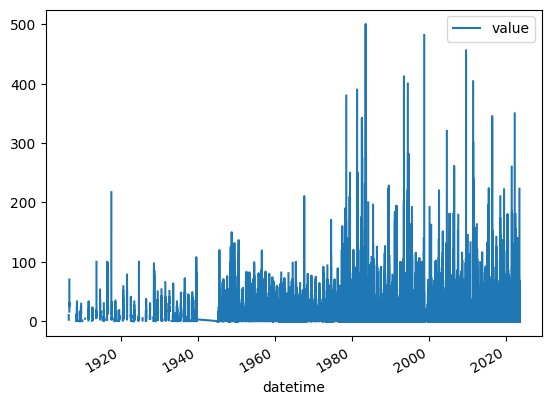

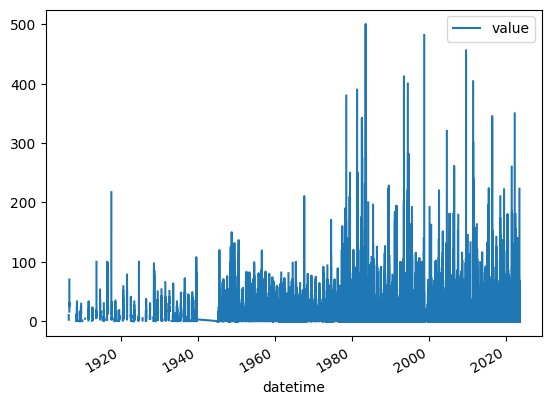

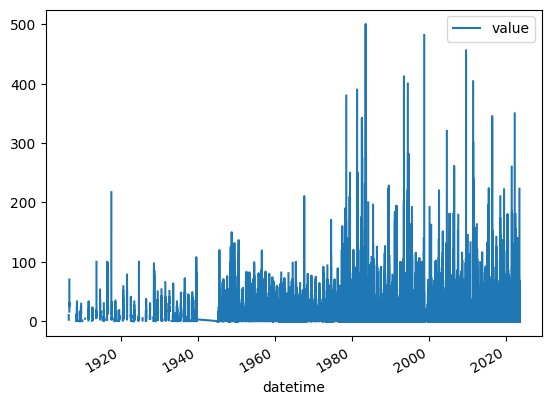

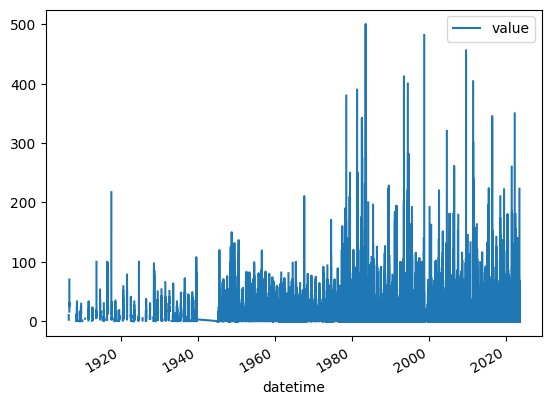

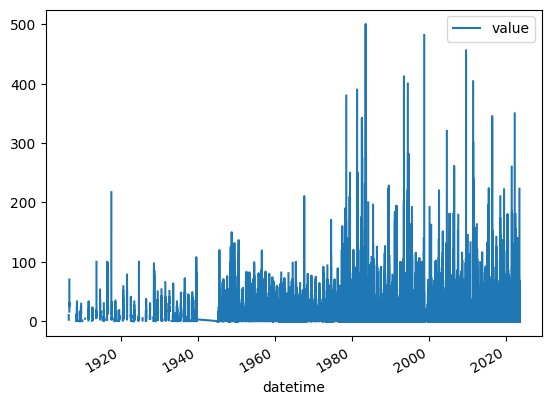

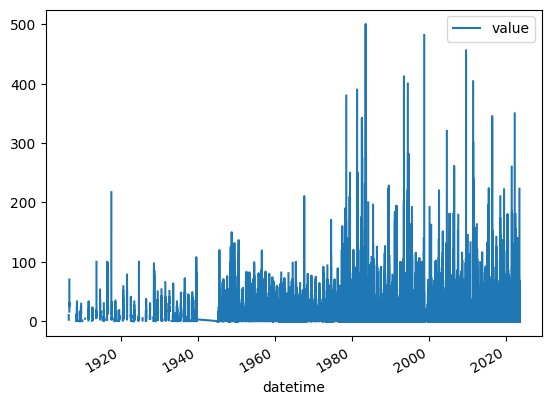

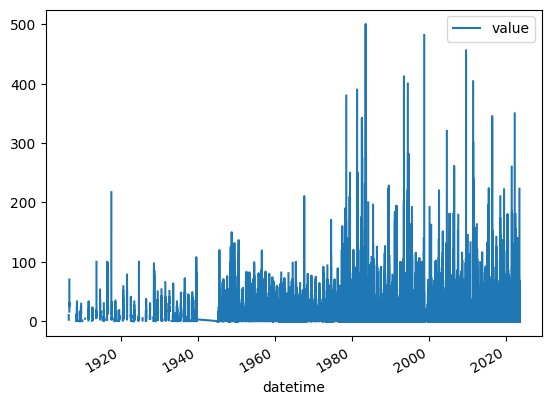

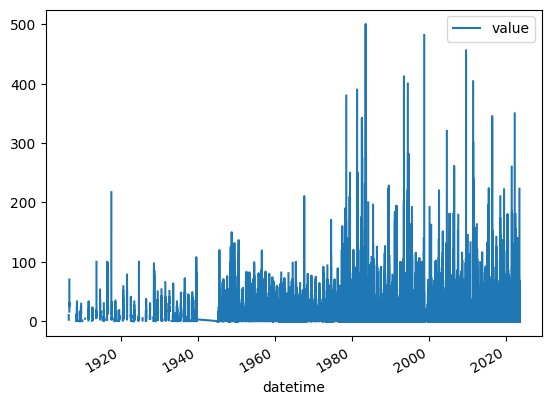

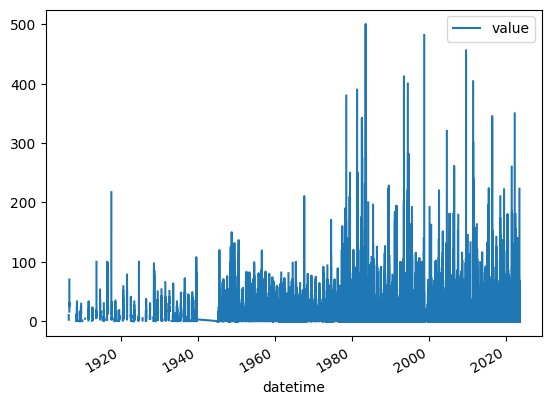

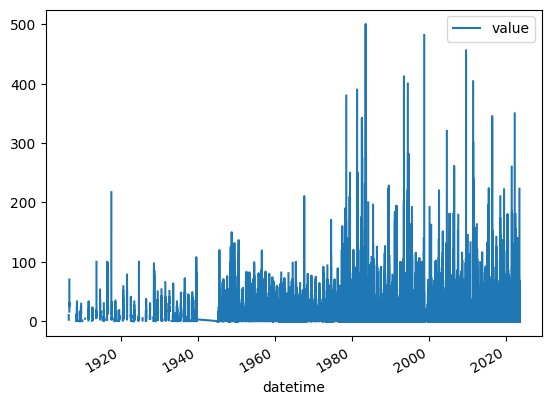

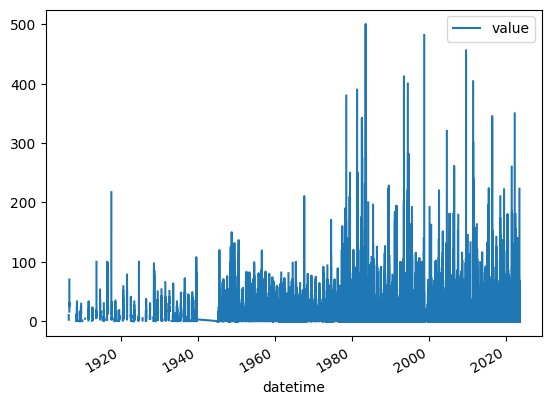

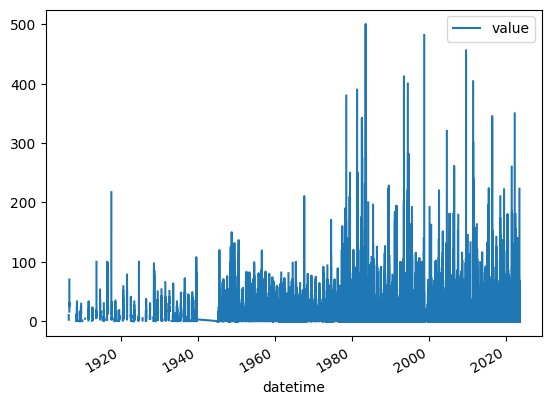

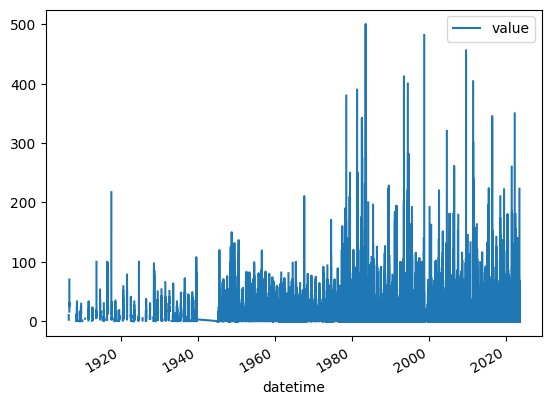

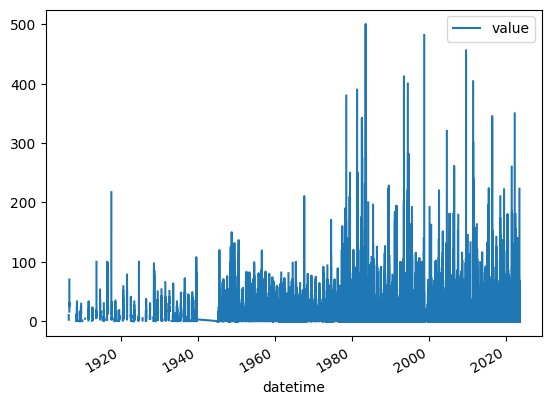

In [ ]:
if download_data:
    cols = ['value']
    for name in df_stations.name.unique():
        print(name)
        #df_camp_mabry[cols][df_camp_mabry['name']=='TX AUSTIN-CAMP MABRY'].plot()
        df_stations[cols][df_stations['element']=='PRCP'].plot()

# Transform station data into netcdf file which

Dimensions for each variable: time x stations

time coordinate will be from the pandas dataframe

stations coordinate will have the value as name of each station

In [ ]:
date_start, date_end = df_stations.index.min(), df_stations.index.max()
date_start, date_end
dates = pd.date_range(start=date_start, end=date_end)
dates

DatetimeIndex(['1906-01-01', '1906-01-02', '1906-01-03', '1906-01-04',
               '1906-01-05', '1906-01-06', '1906-01-07', '1906-01-08',
               '1906-01-09', '1906-01-10',
               ...
               '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25',
               '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29',
               '2023-08-30', '2023-08-31'],
              dtype='datetime64[ns]', length=42977, freq='D')

In [ ]:
vars = df_stations[df_stations['name']=='YAKUBU GOWON'].element.unique()
vars

array(['TAVG', 'TMAX', 'TMIN', 'PRCP'], dtype=object)

<Axes: >

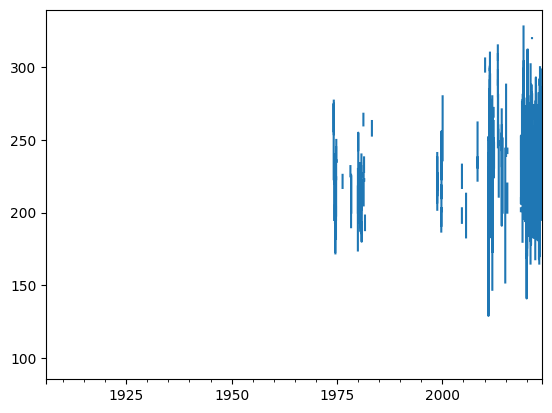

In [ ]:
df_onestation_onevariable = df_stations[(df_stations['element']=='TAVG') & (df_stations['name']=='YAKUBU GOWON')]
#type(df_onestation_onevariable['value'])
df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
df_onestation_onevariable_.plot()

In [ ]:
stations = df_stations.name.unique()
print(stations, stations.shape)

['YAKUBU GOWON' 'MAKURDI' 'MINNA' 'ENUGU' 'MALLAM AMINU INTL' 'YOLA'
 'MAGARIA' 'ILORIN' 'PORT HARCOURT INTL' 'MARADI' 'GAROUA' 'ZINDER'
 'GOURE' 'DOUALA' 'NGAOUNDERE' 'MAIDUGURI' 'MAINE-SORDA' 'MAINE-SOROA'
 'SALAK' "BIRNI N'KONNI" 'DIFFA' 'MURTALA MUHAMMED' 'GAYA' 'DEDOUGOU'
 'PALA' 'DOSSO' 'BERTOUA'] (27,)


In [ ]:
data = []
for station in stations:
    df_onestation_onevariable = df_stations[(df_stations['element']=='TAVG') & (df_stations['name']==station)]
#type(df_onestation_onevariable['value'])
    df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
    data.append(df_onestation_onevariable_)
data = np.asarray(data).T
data.shape

(42977, 27)

In [ ]:
type(data)

numpy.ndarray

In [ ]:
import xarray as xr
ds = xr.Dataset({
    'tavg': xr.DataArray(
                data   = data,   # enter data here
                dims   = ['time', 'station'],
                coords = {'time': dates,'station':stations },
                ),
            },
    )

In [ ]:
data = []
for station in stations:
    df_onestation_onevariable = df_stations[(df_stations['element']=='TMAX') & (df_stations['name']==station)]
#type(df_onestation_onevariable['value'])
    df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
    data.append(df_onestation_onevariable_)
data = np.asarray(data).T
ds['tmax'] = (('time', 'station'), data)

data = []
for station in stations:
    df_onestation_onevariable = df_stations[(df_stations['element']=='TMIN') & (df_stations['name']==station)]
#type(df_onestation_onevariable['value'])
    df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
    data.append(df_onestation_onevariable_)
data = np.asarray(data).T
ds['tmin'] = (('time', 'station'), data)

data = []
for station in stations:
    df_onestation_onevariable = df_stations[(df_stations['element']=='PRCP') & (df_stations['name']==station)]
#type(df_onestation_onevariable['value'])
    df_onestation_onevariable_ = df_onestation_onevariable['value'].reindex(dates)
    data.append(df_onestation_onevariable_)
data = np.asarray(data).T
ds['pr'] = (('time', 'station'), data)

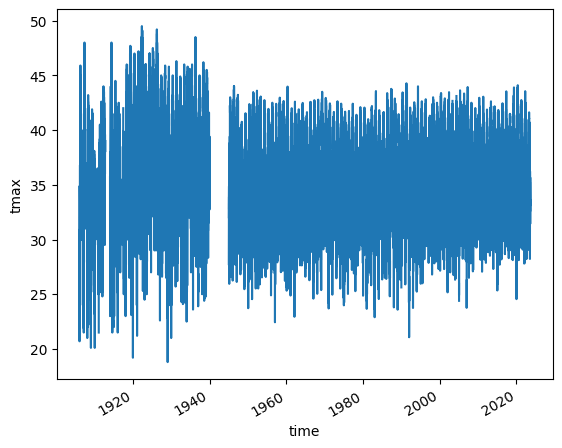

In [ ]:
ds.mean(dim='station').tmax.plot()

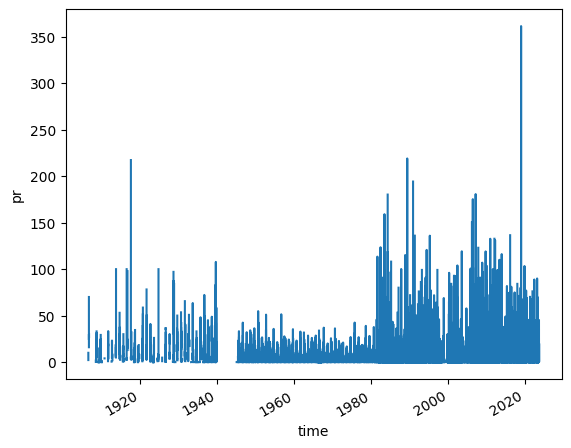

In [ ]:
ds.mean(dim='station').pr.plot()